# Series de tiempo

 1 Importación de bibliotecas:

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
#import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA

2 Datos nasdaq 2024
https://www.nasdaq.com/plus/coming-soon-globally


In [84]:
import pandas as pd
url = "https://drive.google.com/file/d/1miYFEKTMGeF_kF9mqz9BD2b37DoNvFXY/view?usp=drive_link"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url,  delimiter=';', decimal='.')
# Convertir a tipo fecha
df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)
print("Dimensiones del dataset :", df.shape)


Dimensiones del dataset : (1258, 2)


<ipython-input-84-3b191c6be6d9>:6: UserWarning: Parsing dates in %m/%d/%Y format when dayfirst=True was specified. Pass `dayfirst=False` or specify a format to silence this warning.
  df['Fecha'] = pd.to_datetime(df['Fecha'], dayfirst=True)


In [85]:
# ver datos
print(df.head())
print("columnas", df.columns)
print("tipo", df.dtypes)

       Fecha    Cierre
0 2024-08-13  17187.61
1 2024-08-12  16780.61
2 2024-08-09  16745.30
3 2024-08-08  16660.02
4 2024-08-07  16195.81
columnas Index(['Fecha', 'Cierre'], dtype='object')
tipo Fecha     datetime64[ns]
Cierre           float64
dtype: object


In [86]:

# Define 'Date' como columna índice
df.set_index('Fecha', inplace=True)
# Valida el indice DatetimeIndex
if not isinstance(df.index, pd.DatetimeIndex):
    raise ValueError("Valida el indice DatetimeIndex.")


# Seleccionar la serie de tiempo
df = df.asfreq('D')  # 'D' for daily you must specify a period or x must be a pandas object with a PeriodIndex or a DatetimeIndex with a freq not set to None" arises from the seasonal_decompose function because the time
ts = df['Cierre']


 3 Gráfica de la serie original:

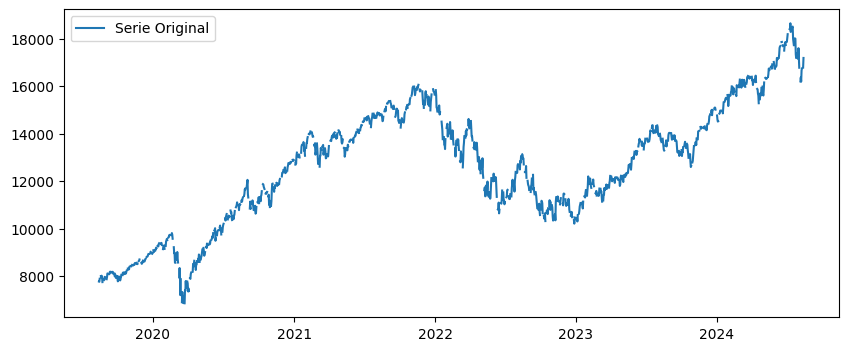

In [87]:
#Grafica de la serie original
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Serie Original')
plt.legend()
plt.show()

4. Descomposición de la serie de tiempo

In [88]:
#Descomposicion de la serie de tiempo
# Handle missing values before decomposition, e.g., by linear interpolation
ts_filled = ts.interpolate(method='linear')

decomposition = seasonal_decompose(ts_filled, model='additive')
#trend = decomposition.trend
#seasonal = decomposition.seasonal
#residual = decomposition.resid

5. Grafica de la secomposicion

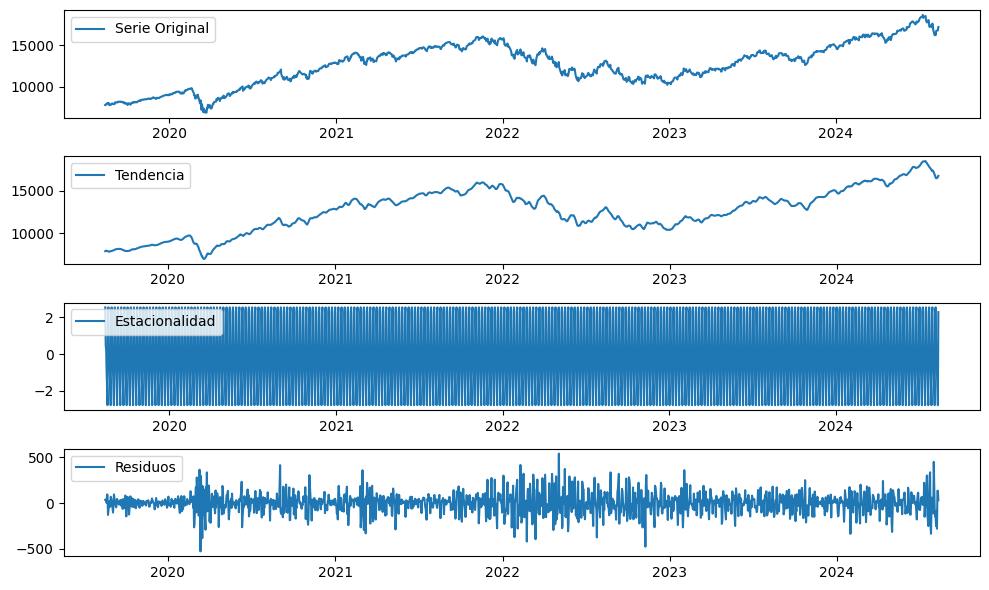

In [89]:
#Grafica de la serie original
plt.figure(figsize=(10, 6))
plt.subplot(4, 1, 1)
plt.plot(ts_filled, label='Serie Original')
plt.legend()

#Grafica de la tendencia
plt.subplot(4, 1, 2)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()

#Grafica de la estacionalidad
plt.subplot(4, 1, 3)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()

#Grafica de los residuos
plt.subplot(4, 1, 4)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# Entrenamiento

In [90]:
train_data, test_data = train_test_split(ts, test_size=0.3, shuffle=False)

Ajustar Modelo

In [91]:
model = ARIMA(train_data, order=(10,1,10))
model_fit = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Realizar pronostico

In [92]:
forecast = model_fit.forecast(steps=len(test_data))

Graficas

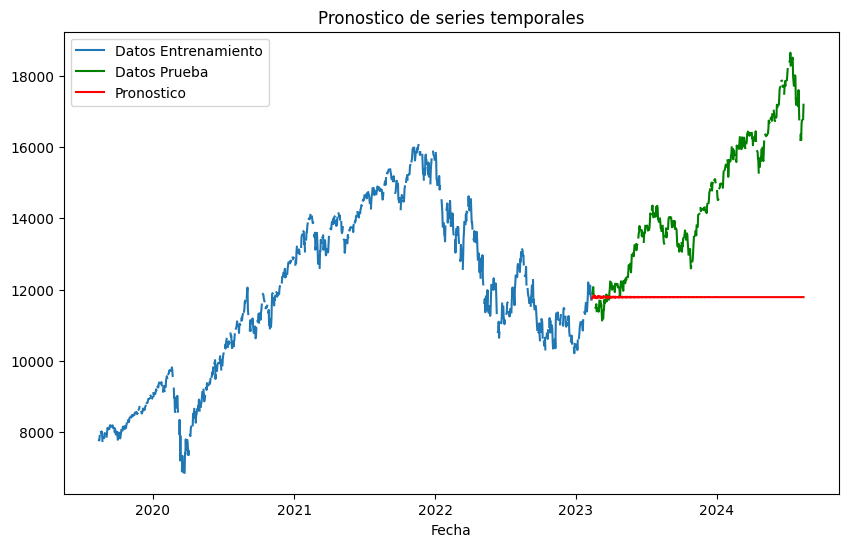

In [93]:
plt.figure(figsize=(10,6))
plt.plot(train_data, label='Datos Entrenamiento')
plt.plot(test_data, label='Datos Prueba', color ='green')
plt.plot(test_data.index, forecast, label='Pronostico', color='red')
plt.legend()
plt.title("Pronostico de series temporales")
plt.xlabel("Fecha")
plt.show()